In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [2]:
projection = cartopy.crs.AlbersEqualArea(central_longitude=-98, central_latitude=37.5, false_easting=0.0, 
                            false_northing=0.0, standard_parallels=(29.5, 45.5), globe=None)
def draw_geography(ax):
        
    countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
    
    for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='Grey', edgecolor='k', zorder=6)
            
    lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
    
    for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
            
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='face', 
                                                facecolor='None'), zorder=6) 
    
    #shapename = 'ne_50m_admin_1_states_provinces'
    #states_shp = shpreader.natural_earth(resolution='50m',
                                     #category='cultural', name=shapename)
    states_shp = '/home/jgoodin1/shapefiles/ne_50m_admin_1_states_provinces.shp'

    for state, info in zip(shpreader.Reader(states_shp).geometries(), shpreader.Reader(states_shp).records()):
        if info.attributes['admin'] == 'United States of America':

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='Grey', edgecolor='k')
            
    for state, info in zip(shpreader.Reader(states_shp).geometries(), shpreader.Reader(states_shp).records()):
        if info.attributes['admin'] == 'United States of America':

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='None', edgecolor='k', zorder=6)


    return ax

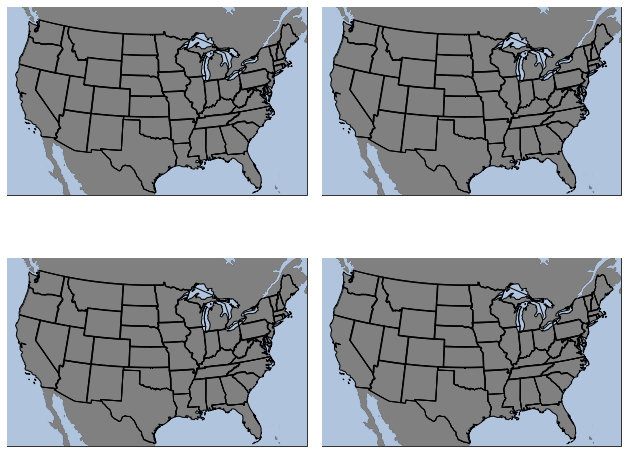

In [41]:
rows, cols = 2, 2
from matplotlib import gridspec
fig = plt.figure(figsize=(11, 9)) 
gs = gridspec.GridSpec(rows, cols, wspace=0.05, hspace=0.05)

for row in range(rows):
    for col in range(cols):
        ax = plt.subplot(gs[row,col], projection=projection)
        ax.set_extent([-120.5, -73.5, 23, 51])
        ax.set(xlabel='x-label', ylabel='y-label')
        #ax.label_outer()
        #gs[0, 0]
        #gs[0, 0].set_title('Panel 1')
        #gs[0, 1]
        #gs[0, 1].set_title('Panel 2')
        #gs[1, 0]
        #gs[1, 0].set_title('Panel 3')
        #gs[1, 1]
        #gs[1, 1].set_title('Panel 4')

        ax = draw_geography(ax)